# Stochastic Gradient Descent

In [ ]:
#Run once per session
!pip install fastai -q --upgrade

Grab the related library we will need

In [ ]:
from fastai.basics import *

Stochastic Gradient Descent (SGD):

* Optimization technique (**optimizer**)
* Commonly used in neural networks
* Example with linear regression

# Linear Regression

* Fit a line on 100 points

In [ ]:
n = 100

Generate our data

In [ ]:
x = torch.ones(n,2)

In [ ]:
len(x), x[:5]

(100, tensor([[1., 1.],
         [1., 1.],
         [1., 1.],
         [1., 1.],
         [1., 1.]]))

Randomize it in a uniform distribution from -1 to 1

In [ ]:
x[:,0].uniform_(-1., 1)
x[:5], x.shape

(tensor([[-0.0318,  1.0000],
         [ 0.2159,  1.0000],
         [-0.9402,  1.0000],
         [ 0.1420,  1.0000],
         [ 0.5565,  1.0000]]), torch.Size([100, 2]))

* Any linear model is `y=mx+b`
* `m`, `x`, and `b` are matrices
* We have `x`

In [ ]:
m = tensor(3.,2); m, m.shape

(tensor([3., 2.]), torch.Size([2]))

* `b` is a random bias

In [ ]:
b = torch.rand(n); b[:5], b.shape

(tensor([0.7173, 0.7303, 0.1615, 0.2098, 0.8227]), torch.Size([100]))

Now we can make our `y`
* Matrix multiplication is denoted with `@`

In [ ]:
y = x@m + b

We'll know if we got a size wrong if:

In [ ]:
m@x + b

RuntimeError: ignored

Plot our results

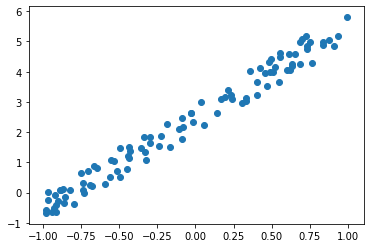

In [ ]:
plt.scatter(x[:,0], y)

Our **weights** from last lesson should minimize the distance between points and our line.

* **mean squared error**: Take distance from `pred` and `y`, square, then average

In [ ]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

When we run our model, we are trying to predict `m`

For example, say `a = (0.5, 0.75)`.

* Make a prediction
* Calculate the error

In [ ]:
a = tensor(.5, .75)

Make prediction

In [ ]:
y_pred = x@a

Calculate error

In [ ]:
mse(y_pred, y)

tensor(4.8796)

What does that **mean**? Let's plot it

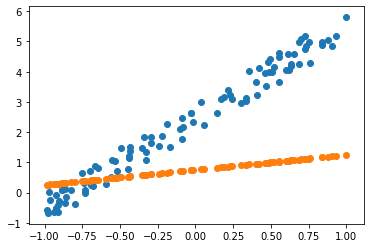

In [ ]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_pred)

Model doesn't seen to quite fit. What's next? **Optimization**

# Walking down Gradient Descent

* Goal: Minimize the loss function (`mse`)
* Gradient Descent:
  * Starts with parameters
  * Moves towards new parameters to minimize the function
  * Take steps in the negative direction of gradient function

First let's make this `parameter`

In [ ]:
a = nn.Parameter(a); a

Parameter containing:
tensor([0.5000, 0.7500], requires_grad=True)

Next let's create an `update` function to check if the current `a` improved. If so, move even closer.

We'll print out every 10 iterations to see how we are doing

In [ ]:
def update():
  y_hat = x@a
  loss = mse(y, y_hat)
  if i % 10 == 0: print(loss)
  loss.backward()
  with torch.no_grad():
    a.sub_(lr * a.grad)
    a.grad.zero_()

* `torch.no_grad`: No back propogation (no updating of our weights)
* `sub_`: Subtracts some value (lr * our gradient)
* `grad.zero_`: Zeros our gradients

In [ ]:
lr = 1e-1

In [ ]:
for i in range(100): update()

tensor(3.7350, grad_fn=<MeanBackward0>)
tensor(0.5128, grad_fn=<MeanBackward0>)
tensor(0.1768, grad_fn=<MeanBackward0>)
tensor(0.1048, grad_fn=<MeanBackward0>)
tensor(0.0890, grad_fn=<MeanBackward0>)
tensor(0.0856, grad_fn=<MeanBackward0>)
tensor(0.0848, grad_fn=<MeanBackward0>)
tensor(0.0847, grad_fn=<MeanBackward0>)
tensor(0.0846, grad_fn=<MeanBackward0>)
tensor(0.0846, grad_fn=<MeanBackward0>)


Now let's see how this new `a` compares. 

* Detach removes all gradients

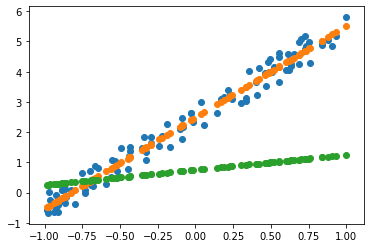

In [ ]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0], (x@a).detach())
plt.scatter(x[:,0],y_pred)

We fit our line **much** better here

# Animate the process

In [ ]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

Let's redo the process and animate our y closing in

In [ ]:
a = nn.Parameter(tensor(0.5, 0.75)); a

Parameter containing:
tensor([0.5000, 0.7500], requires_grad=True)

We'll want to set a new `y` to our `x@a`

In [ ]:
def animate(i):
  update()
  line.set_ydata((x@a).detach())
  return line,

Let's create a base figure

In [ ]:
fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], (x@a).detach())
plt.close()

And animate!

In [ ]:
animation.FuncAnimation(fig, animate, np.arange(0,100), interval=20)

Ideally we split things up into batches of data to fit, and then work with all those batches (else we'd run out of memory!

If this were a classification problem, we would want to use `Cross Entropy Loss`, where we penalize incorrect confident predictions along with correct unconfident predictions. It's also called `negative loss likelihood`